# Assignment 3

For BABI 4005 DQM with Python

By: ITMG 4J Sijian Liang (Cindy)

_Updated 2025-01-26_


In [2]:
## Import any libraries/modules/packages 

## pandas is the dplyr of python, it lets us deal with data frames
import pandas 
import numpy as np
from datetime import date #importing the datetime class

## graphic packages
import matplotlib.pyplot as plt
import seaborn as sns

## and make sure our plots look good
%matplotlib inline

In [3]:
## Look at the data from the Kaggle: Heart Attack Risk dataset: https://www.kaggle.com/datasets/arifmia/heart-attack-risk-dataset
Heart_risk = pandas.read_csv("../data/heart_attack_risk_dataset.csv") 

# Introduction

## Heart Attack Risk Prediction Dataset

__Dataset Overview__

The Heart Attack Risk Prediction Dataset is a dataset from Kaggle (https://www.kaggle.com/datasets/arifmia/heart-attack-risk-dataset). 

- It contains 50,000 rows and 20 columns, capturing various attributes that may have effects on heart attack.

- It is a clean dataset without any null values. The key variable is Heart_Attack_Risk (Low, Moderate, High).

- It contains 2 "float64" columns, 7 "object" columns, and 11 "int64" columns. However, 7 out of 11 "int64" columns should be boolean columns. To analyze more conveniently, I converted 7 "int64" columns to "boolean" columns. 

Details are as below.

__Graphs of Dataset and Data Analysis__

Following the "Data Summary" section, five analyses were conducted to provide insights into the dataset. While heart attack risk may be influenced by various factors, these analyses focus on basic observations and patterns, without delving into causal relationships between specific elements and heart attack risks.

# Data Summary

## 1. Total Rows and Columns
50000 rows and 20 columns

In [7]:
Heart_risk.shape
print("There are",Heart_risk.shape[0],"rows and",Heart_risk.shape[1],"columns")

There are 50000 rows and 20 columns


## 2. Summary Statistics

In [9]:
Heart_risk.describe(include = "all").round(2) #summaries all statistics

,Age,Gender,Smoking,Alcohol_Consumption,Physical_Activity_Level,BMI,Diabetes,Hypertension,Cholesterol_Level,Resting_BP,Heart_Rate,Family_History,Stress_Level,Chest_Pain_Type,Thalassemia,Fasting_Blood_Sugar,ECG_Results,Exercise_Induced_Angina,Max_Heart_Rate_Achieved,Heart_Attack_Risk
count,50000.0,50000,50000.00,50000.00,50000,50000.00,50000.0,50000.00,50000.00,50000.00,50000.00,50000.00,50000,50000,50000,50000.00,50000,50000.0,50000.00,50000
unique,NaN,2,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,4,3,NaN,3,NaN,NaN,3
top,NaN,Female,NaN,NaN,Low,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Moderate,Typical,Normal,NaN,Normal,NaN,NaN,Low
freq,NaN,25086,NaN,NaN,20061,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24971,12642,16797,NaN,16799,NaN,NaN,25024
mean,53.4,NaN,0.30,0.40,NaN,27.52,0.2,0.30,225.04,134.43,94.53,0.30,NaN,NaN,NaN,0.15,NaN,0.2,149.31,NaN
std,20.8,NaN,0.46,0.49,NaN,7.23,0.4,0.46,43.32,25.91,20.19,0.46,NaN,NaN,NaN,0.36,NaN,0.4,28.82,NaN
min,18.0,NaN,0.00,0.00,NaN,15.00,0.0,0.00,150.00,90.00,60.00,0.00,NaN,NaN,NaN,0.00,NaN,0.0,100.00,NaN
25%,35.0,NaN,0.00,0.00,NaN,21.27,0.0,0.00,187.30,112.00,77.00,0.00,NaN,NaN,NaN,0.00,NaN,0.0,124.00,NaN
50%,53.0,NaN,0.00,0.00,NaN,27.54,0.0,0.00,225.10,134.00,94.00,0.00,NaN,NaN,NaN,0.00,NaN,0.0,149.00,NaN
75%,71.0,NaN,1.00,1.00,NaN,33.77,0.0,1.00,262.60,157.00,112.00,1.00,NaN,NaN,NaN,0.00,NaN,0.0,174.00,NaN


## 3. NA values in each column

All columns have value. It is a non-null dataset.

In [11]:
## NA values in each column
print(Heart_risk.isna().sum()) # isna - find how many na values; sum() is summary function


Age                        0
Gender                     0
Smoking                    0
Alcohol_Consumption        0
Physical_Activity_Level    0
BMI                        0
Diabetes                   0
Hypertension               0
Cholesterol_Level          0
Resting_BP                 0
Heart_Rate                 0
Family_History             0
Stress_Level               0
Chest_Pain_Type            0
Thalassemia                0
Fasting_Blood_Sugar        0
ECG_Results                0
Exercise_Induced_Angina    0
Max_Heart_Rate_Achieved    0
Heart_Attack_Risk          0
dtype: int64


## 4. Summary of Data Types

It contains 2 "float64" columns, 7 "object" columns, and 11 "int64" columns. However, 7 out of 11 "int64" columns should be boolean variables. 


In [13]:
# count the number of each data type
data_type_counts = Heart_risk.dtypes.value_counts()
print(data_type_counts)

# data type detail list
Heart_risk.dtypes


int64      11
object      7
float64     2
Name: count, dtype: int64


Age                          int64
Gender                      object
Smoking                      int64
Alcohol_Consumption          int64
Physical_Activity_Level     object
BMI                        float64
Diabetes                     int64
Hypertension                 int64
Cholesterol_Level          float64
Resting_BP                   int64
Heart_Rate                   int64
Family_History               int64
Stress_Level                object
Chest_Pain_Type             object
Thalassemia                 object
Fasting_Blood_Sugar          int64
ECG_Results                 object
Exercise_Induced_Angina      int64
Max_Heart_Rate_Achieved      int64
Heart_Attack_Risk           object
dtype: object

### Convert 7 int64 Columns to Boolean Variables

In [15]:
# Convert 7 int64 columns to boolean variables
# Including Smoking, Alcohol_Consumption, Diabetes, Hypertension, Hypertension, Family_History, Fasting_Blood_Sugar, Exercise_Induced_Angina

Heart_risk['Smoking'] = Heart_risk['Smoking'].apply(lambda x: True if x == 1 else False)
Heart_risk['Alcohol_Consumption'] = Heart_risk['Alcohol_Consumption'].apply(lambda x: True if x == 1 else False)
Heart_risk['Diabetes'] = Heart_risk['Diabetes'].apply(lambda x: True if x == 1 else False)
Heart_risk['Hypertension'] = Heart_risk['Hypertension'].apply(lambda x: True if x == 1 else False)
Heart_risk['Family_History'] = Heart_risk['Family_History'].apply(lambda x: True if x == 1 else False)
Heart_risk['Fasting_Blood_Sugar'] = Heart_risk['Fasting_Blood_Sugar'].apply(lambda x: True if x == 1 else False)
Heart_risk['Exercise_Induced_Angina'] = Heart_risk['Exercise_Induced_Angina'].apply(lambda x: True if x == 1 else False)

Heart_risk.head(15)


,Age,Gender,Smoking,Alcohol_Consumption,Physical_Activity_Level,BMI,Diabetes,Hypertension,Cholesterol_Level,Resting_BP,Heart_Rate,Family_History,Stress_Level,Chest_Pain_Type,Thalassemia,Fasting_Blood_Sugar,ECG_Results,Exercise_Induced_Angina,Max_Heart_Rate_Achieved,Heart_Attack_Risk
0,69,Female,True,False,Moderate,34.61,True,False,152.1,171,85,False,Moderate,Non-anginal,Reversible defect,False,Normal,False,114,Low
1,32,Male,False,False,Moderate,22.75,False,False,166.8,126,103,False,Low,Asymptomatic,Normal,False,ST-T abnormality,False,173,Moderate
2,89,Male,False,True,Moderate,35.32,False,False,272.3,123,127,False,Low,Typical,Reversible defect,False,ST-T abnormality,False,109,Low
3,78,Male,False,True,Moderate,18.23,True,False,237.7,144,125,False,Low,Typical,Fixed defect,True,Left Ventricular Hypertrophy,False,129,Low
4,38,Female,True,False,Moderate,19.82,False,False,207.7,123,107,False,High,Asymptomatic,Reversible defect,False,ST-T abnormality,False,124,Moderate
5,41,Male,False,True,Moderate,36.11,False,False,271.2,141,119,False,Low,Atypical,Fixed defect,False,Normal,False,101,High
6,20,Male,True,False,Low,15.12,False,False,164.8,154,67,False,Low,Non-anginal,Normal,False,Normal,False,176,Low
7,39,Female,False,False,Moderate,20.78,False,False,297.0,91,112,False,Low,Atypical,Normal,False,ST-T abnormality,True,134,Moderate
8,70,Male,False,True,High,29.20,False,False,280.7,121,71,False,Moderate,Non-anginal,Fixed defect,False,ST-T abnormality,False,168,Moderate
9,19,Female,False,False,High,35.54,False,True,275.0,167,76,False,Low,Typical,Reversible defect,True,Left Ventricular Hypertrophy,False,102,Moderate


In [16]:
# Update data type detail list
Heart_risk.dtypes

Age                          int64
Gender                      object
Smoking                       bool
Alcohol_Consumption           bool
Physical_Activity_Level     object
BMI                        float64
Diabetes                      bool
Hypertension                  bool
Cholesterol_Level          float64
Resting_BP                   int64
Heart_Rate                   int64
Family_History                bool
Stress_Level                object
Chest_Pain_Type             object
Thalassemia                 object
Fasting_Blood_Sugar           bool
ECG_Results                 object
Exercise_Induced_Angina       bool
Max_Heart_Rate_Achieved      int64
Heart_Attack_Risk           object
dtype: object

In [17]:

file_name = "Heart_attack_risk_Clean_Data_"+ date.today().isoformat()+'.csv'

Heart_risk.to_csv(file_name)

# Graphs of Dataset and Data Analysis

The following analysis examines participants at high risk for heart attacks, focusing on their gender, age, and BMI, while providing key health metrics as reference data for this high-risk group. The analysis is divided into the following sections:

1. __Percentage of Participants in Heart Attack Risk__

    A breakdown of the prevalence of heart attack risk among 5,000 participants.
   
2. __Gender Distribution of Heart Attack Risks__

    Analyzing how heart attack risk varies between males and females.

3. __Age Group Analysis of High Heart Attack Risk__

    Insights into the age groups most affected by high heart attack risk.

4. __BMI Trends by Age and Gender__

    Visualization of how BMI changes with age across genders in the high heart attack risk group.

5. __Health Metric Summary for High-Risk Participants__

    A table summarizing key health measures such as cholesterol levels, resting blood pressure, and heart rate for participants at high risk.

## 1. Percentage of Participants in Heart Attack Risk

The pie chart shows the percentage of different heart attack risks among 5,000 participants. 

20.1% of participants are considered to have high heart attack risk. 

29.8% of them are moderate risk and 50% of them are low risk.

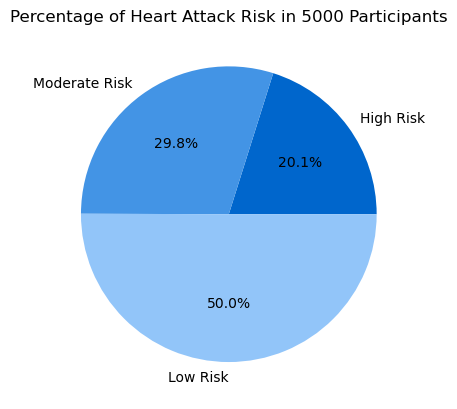

In [20]:

# Learned from: 
## W3schools Pie Charts: https://www.w3schools.com/python/matplotlib_pie_charts.asp 
## Matplotlib: https://matplotlib.org/stable/gallery/pie_and_polar_charts/pie_features.html
## Color family: https://www.patternfly.org/charts/colors-for-charts/

# Define three kinds of heart attack risk  
High = Heart_risk.query("Heart_Attack_Risk == 'High'").shape[0]
Moderate = Heart_risk.query("Heart_Attack_Risk == 'Moderate'").shape[0]
Low = Heart_risk.query("Heart_Attack_Risk == 'Low'").shape[0]

#Create a pie chart by risk
y = np.array([High, Moderate, Low])
Status = ["High Risk", "Moderate Risk", "Low Risk"]
mycolors = ["#0066CC", "#4394E5","#92C5F9"]

plt.title("Percentage of Heart Attack Risk in 5000 Participants")
plt.pie(y, labels = Status, colors = mycolors, autopct='%1.1f%%')

plt.show() 

## 2. Distribution of Heart Attack Risks by Gender

In a total of 5000 data samples, the number of high heart attack risks in females is slightly more than in males.

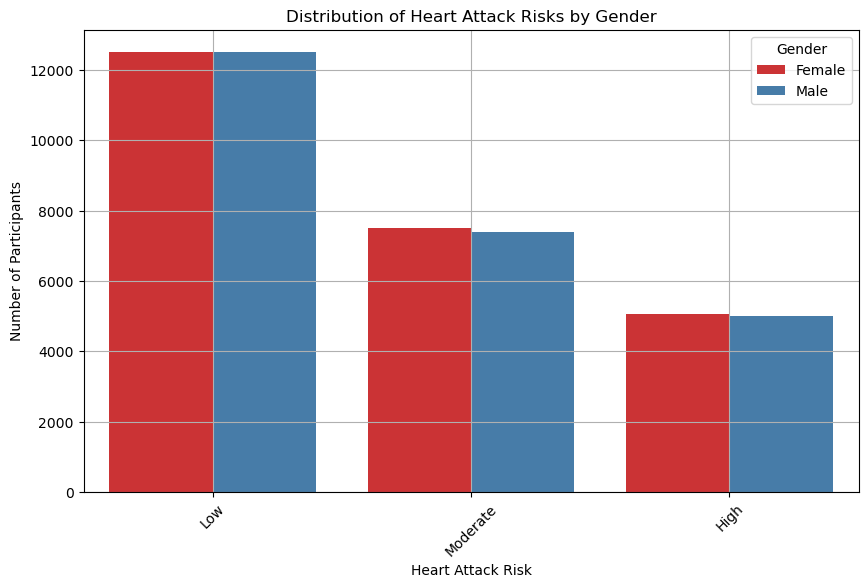

In [22]:
# Create a count plot
plt.figure(figsize=(10, 6))

sns.countplot(x="Heart_Attack_Risk", hue="Gender", data=Heart_risk, palette= "Set1")

plt.title("Distribution of Heart Attack Risks by Gender")
plt.xlabel("Heart Attack Risk")
plt.ylabel("Number of Participants")
plt.legend(title="Gender")
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

## 3. Age Group Analysis of High Heart Attack Risk

The bar chart shows that the majority of participants who are considered to be at “high risk of heart disease” are aged 56-65. With following is the 36-45 age group.

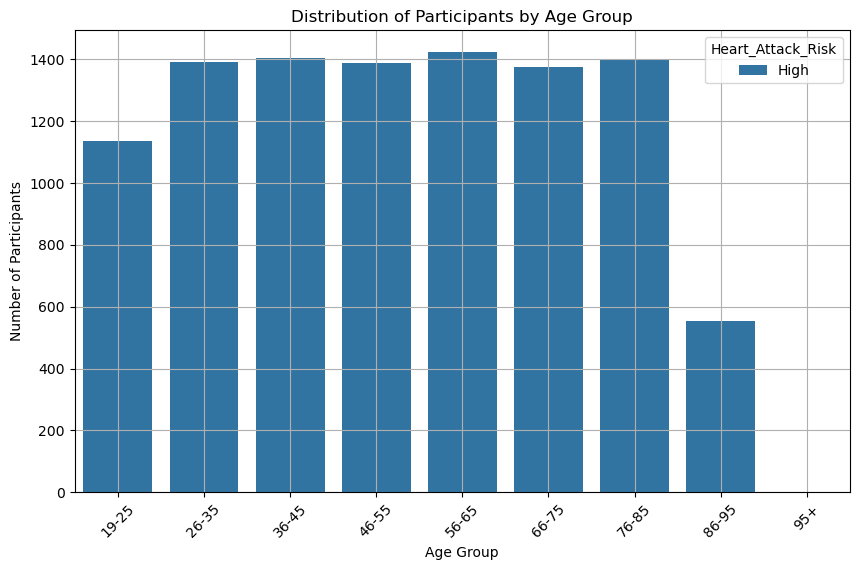

In [24]:
# Learned from: Stackoverflow: https://stackoverflow.com/questions/73655852/how-to-bin-age-data-into-categories-issues-with-setting-highs-and-lows

Heart_risk_1 = Heart_risk.query("Heart_Attack_Risk == 'High'")
Heart_risk_high = pandas.DataFrame(Heart_risk_1)

# Bin age group of customer
binned = pandas.cut(
    Heart_risk_high["Age"],
    bins=[-np.inf, 25, 35, 45, 55, 65, 75, 85, 95, np.inf],
    labels=["19-25", "26-35", "36-45", "46-55", "56-65", "66-75", "76-85", "86-95", "95+"],
)

# Add the binned column to the DataFrame
Heart_risk_high["Age_Group"] = binned

# Create a count plot
plt.figure(figsize=(10, 6))

sns.countplot(x="Age_Group", hue="Heart_Attack_Risk", data=Heart_risk_high, palette= "tab10")

plt.title("Distribution of Participants by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Number of Participants")
plt.legend(title="Heart_Attack_Risk")
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

## 4. BMI Change by Age and Gender in High Heart Attack Risk Group

Based on the age group and gender, the line chart shows the average BMI changes in the high heart attack risk group. In the age group "56-65", male has the highest BMI and females' BMI tends to increase.

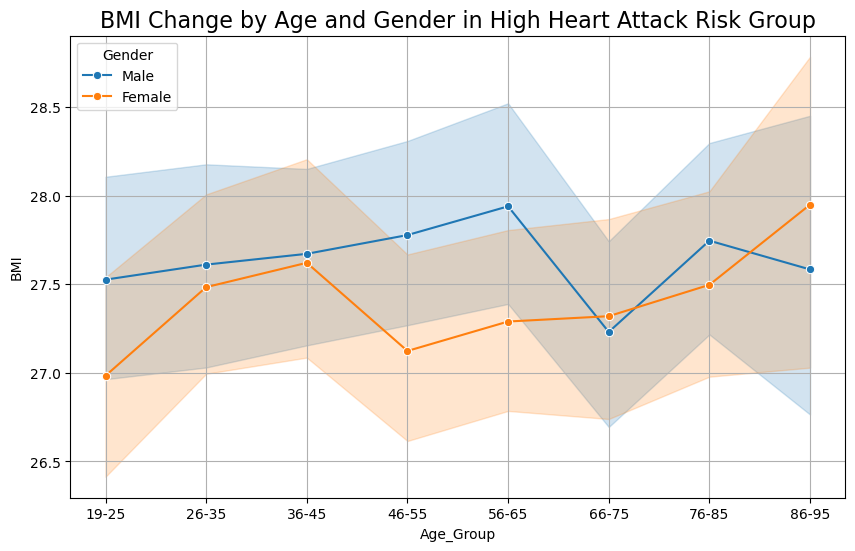

In [26]:
# Plot a line chart for BMI
plt.figure(figsize=(10, 6))
sns.lineplot(data=Heart_risk_high, x='Age_Group', y='BMI', hue='Gender', marker='o') #sns.lineplot() automatically calculates the mean 
plt.title('BMI Change by Age and Gender in High Heart Attack Risk Group', fontsize=16) 
plt.xlabel('Age_Group')
plt.ylabel('BMI')
plt.legend(title='Gender')
plt.grid(True)
plt.show()

# Learn from: 
# https://seaborn.pydata.org/generated/seaborn.lineplot.html; 
# https://www.geeksforgeeks.org/seaborn-lineplot-method-in-python/; 
# https://learn.saylor.org/mod/book/view.php?id=55306&chapterid=40878

## 5. Health Metric Summary for High-Risk Participants

Focused on the age 56-66 samples, some health metrics for high heart attack risk participants were summarized, including BMI, Cholesterol Level, Heart Rate and Resting blood pressure (BP) by gender. 

In [28]:
Heart_risk_high2 = Heart_risk.query("Heart_Attack_Risk == 'High' & Age > 56 & Age < 66 ")
Heart_risk_2 = pandas.DataFrame(Heart_risk_high2)

pivot_Heart_risk_2 = pandas.pivot_table(Heart_risk_2, index=["Age", "Gender"], 
                                values=["BMI", "Cholesterol_Level", "Resting_BP", "Heart_Rate"],
                                aggfunc='mean')

pivot_Heart_risk_2.round(2)


BMI  Cholesterol_Level  Heart_Rate  Resting_BP
Age Gender                                                  
57  Female  28.45             226.50       95.96      128.92
    Male    27.68             220.34       91.67      133.77
58  Female  27.32             225.23       96.64      140.46
    Male    28.76             226.14       89.95      134.72
59  Female  27.51             219.38       95.78      129.57
    Male    28.09             228.88       93.86      126.59
60  Female  26.68             226.60       92.95      131.84
    Male    27.65             226.50       96.73      131.62
61  Female  28.16             228.54       94.87      137.72
    Male    27.40             222.76       91.98      134.34
62  Female  27.89             229.52       96.34      135.12
    Male    26.05             225.13       96.63      134.76
63  Female  27.44             219.87       96.56      137.66
    Male    28.79             223.10       96.63      135.37
64  Female  25.61             223.16       97.09      135.03
    Male    29.07             232.98       94.95      139.61
65  Female  27.76             229.36       93.98      131.08
    Male    27.48             226.40       98.75      135.39

*End of the Assignment 3*

*For BABI 4005 DQM with Python*

*By: ITMG 4J Sijian Liang (Cindy)*
